In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
df=pd.read_csv("titanic_dataset.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df["Age"]=df["Age"].fillna(df["Age"].median())

In [5]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

In [6]:
df["Cabin"]=df["Cabin"].fillna(df["Cabin"].mode()[0])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:>

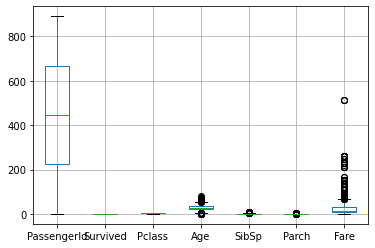

In [9]:
df.boxplot()

In [10]:
cols = ['Age', 'SibSp','Parch','Fare'] # one or more.
Q1 = df[cols]. quantile(0.25)
Q3 = df[cols]. quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))). any(axis=1)]

<AxesSubplot:>

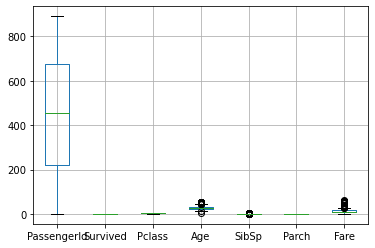

In [11]:
df.boxplot()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  577 non-null    int64  
 1   Survived     577 non-null    int64  
 2   Pclass       577 non-null    int64  
 3   Name         577 non-null    object 
 4   Sex          577 non-null    object 
 5   Age          577 non-null    float64
 6   SibSp        577 non-null    int64  
 7   Parch        577 non-null    int64  
 8   Ticket       577 non-null    object 
 9   Fare         577 non-null    float64
 10  Cabin        577 non-null    object 
 11  Embarked     577 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 58.6+ KB


In [13]:
df["Embarked"].value_counts()

S    433
C     80
Q     64
Name: Embarked, dtype: int64

In [14]:
df["Pclass"].value_counts()

3    373
2    121
1     83
Name: Pclass, dtype: int64

In [15]:
df["Survived"].value_counts()

0    404
1    173
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

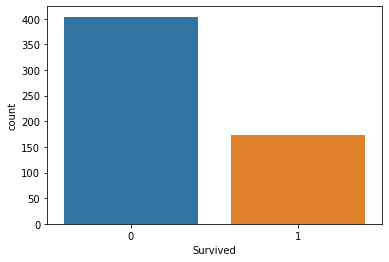

In [16]:
sns.countplot(x="Survived",data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

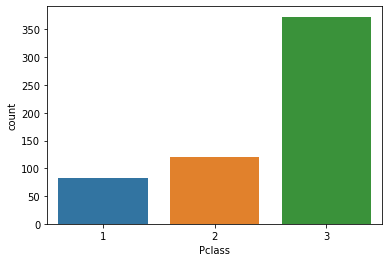

In [17]:
sns.countplot(x="Pclass",data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

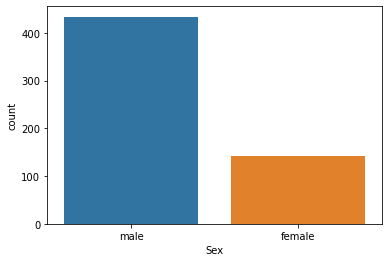

In [18]:
sns.countplot(x="Sex",data=df)

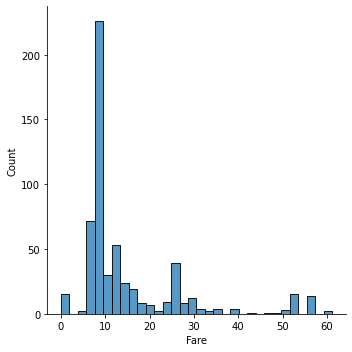

In [19]:
sns.displot(df["Fare"])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

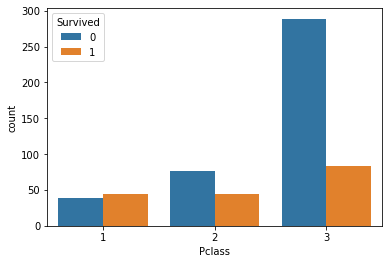

In [20]:
sns.countplot(x="Pclass",hue="Survived",data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

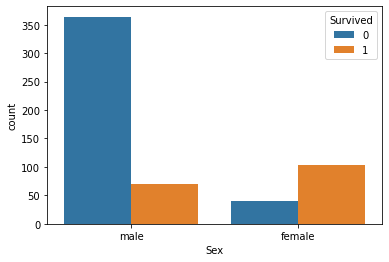

In [21]:
sns.countplot(x="Sex",hue="Survived",data=df)

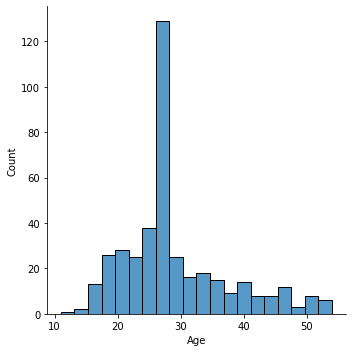

In [22]:
sns.displot(df[df["Survived"]==0]["Age"])

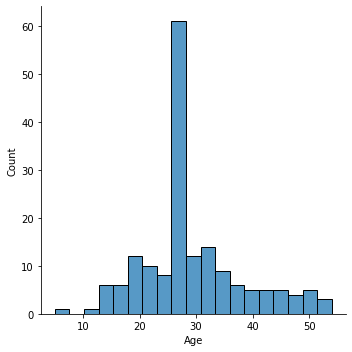

In [23]:
sns.displot(df[df["Survived"]==1]["Age"])

In [24]:
pd.crosstab(df["Pclass"],df["Survived"])

Survived,0,1
Pclass,,
1,39,44
2,76,45
3,289,84


In [25]:
pd.crosstab(df["Sex"],df["Survived"])

Survived,0,1
Sex,,
female,40,103
male,364,70


In [26]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.050556,-0.054511,0.048287,-0.102197,NaN,0.019040
Survived,-0.050556,1.000000,-0.242189,0.009310,0.097999,NaN,0.268890
Pclass,-0.054511,-0.242189,1.000000,-0.363467,-0.078664,NaN,-0.670942
Age,0.048287,0.009310,-0.363467,1.000000,0.029707,NaN,0.265009
SibSp,-0.102197,0.097999,-0.078664,0.029707,1.000000,NaN,0.345588
Parch,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,0.019040,0.268890,-0.670942,0.265009,0.345588,NaN,1.000000


<AxesSubplot:>

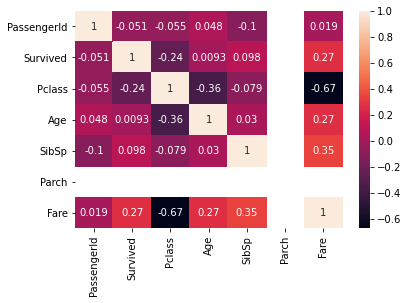

In [27]:
sns.heatmap(df.corr(),annot=True)